In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import public modules
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import custom modules
from applications.molecules.src import utils
from applications.molecules.src import plotting

# Use latex-like font for figures
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family']      = 'STIXGeneral'

# Generate the figures directory if it does not exist yet
figures_dir_path = '../figures/'
utils.create_folder_if_inexistent(figures_dir_path)

[17:10:24] Initializing Normalizer


In [3]:
######################################################################################################
### Load the generated molecules for different target properties as different DataFrames
######################################################################################################
# Define the generated directory
generated_dir = '../generated/article'

# Define the name of the samples table files
samples_table_name = 'samples_table.tsv'

# Define a dictionary with all the different directory paths 
# relative to the generation directory
rel_dir_path_dict = {
    # Number of rings
    'num_rings=1_T=05_exact':         'num_rings=1|n=1000',
    'num_rings=1_T=05_TAG':           'num_rings=1|n=1000|sampler.grad_approx=True',
    'num_rings=1_T=05_DiGress':       'num_rings=1|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=1_T=1_exact':          'num_rings=1|n=1000|sampler.guide_temp=1',
    'num_rings=1_T=1_TAG':            'num_rings=1|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'num_rings=1_T=1_DiGress':        'num_rings=1|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=1_T=5_exact':          'num_rings=1|n=1000|sampler.guide_temp=5',
    'num_rings=1_T=5_TAG':            'num_rings=1|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'num_rings=1_T=5_DiGress':        'num_rings=1|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    'num_rings=3_T=05_exact':         'num_rings=3|n=1000',
    'num_rings=3_T=05_TAG':           'num_rings=3|n=1000|sampler.grad_approx=True',
    'num_rings=3_T=05_DiGress':       'num_rings=3|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=3_T=1_exact':          'num_rings=3|n=1000|sampler.guide_temp=1',
    'num_rings=3_T=1_TAG':            'num_rings=3|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'num_rings=3_T=1_DiGress':        'num_rings=3|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=3_T=5_exact':          'num_rings=3|n=1000|sampler.guide_temp=5',
    'num_rings=3_T=5_TAG':            'num_rings=3|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'num_rings=3_T=5_DiGress':        'num_rings=3|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    'num_rings=5_T=05_exact':         'num_rings=5|n=1000',
    'num_rings=5_T=05_TAG':           'num_rings=5|n=1000|sampler.grad_approx=True',
    'num_rings=5_T=05_DiGress':       'num_rings=5|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=5_T=1_exact':          'num_rings=5|n=1000|sampler.guide_temp=1',
    'num_rings=5_T=1_TAG':            'num_rings=5|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'num_rings=5_T=1_DiGress':        'num_rings=5|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=5_T=5_exact':          'num_rings=5|n=1000|sampler.guide_temp=5',
    'num_rings=5_T=5_TAG':            'num_rings=5|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'num_rings=5_T=5_DiGress':        'num_rings=5|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    # LogP
    'logp=-2_T=05_exact':         'logp=-2|n=1000',
    'logp=-2_T=05_TAG':           'logp=-2|n=1000|sampler.grad_approx=True',
    'logp=-2_T=05_DiGress':       'logp=-2|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=-2_T=1_exact':          'logp=-2|n=1000|sampler.guide_temp=1',
    'logp=-2_T=1_TAG':            'logp=-2|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'logp=-2_T=1_DiGress':        'logp=-2|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=-2_T=5_exact':          'logp=-2|n=1000|sampler.guide_temp=5',
    'logp=-2_T=5_TAG':            'logp=-2|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'logp=-2_T=5_DiGress':        'logp=-2|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    'logp=4_T=05_exact':          'logp=4|n=1000',
    'logp=4_T=05_TAG':            'logp=4|n=1000|sampler.grad_approx=True',
    'logp=4_T=05_DiGress':        'logp=4|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=4_T=1_exact':           'logp=4|n=1000|sampler.guide_temp=1',
    'logp=4_T=1_TAG':             'logp=4|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'logp=4_T=1_DiGress':         'logp=4|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=4_T=5_exact':           'logp=4|n=1000|sampler.guide_temp=5',
    'logp=4_T=5_TAG':             'logp=4|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'logp=4_T=5_DiGress':         'logp=4|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    'logp=10_T=05_exact':         'logp=10|n=1000',
    'logp=10_T=05_TAG':           'logp=10|n=1000|sampler.grad_approx=True',
    'logp=10_T=05_DiGress':       'logp=10|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=10_T=1_exact':          'logp=10|n=1000|sampler.guide_temp=1',
    'logp=10_T=1_TAG':            'logp=10|n=1000|sampler.guide_temp=1|sampler.grad_approx=True',
    'logp=10_T=1_DiGress':        'logp=10|n=1000|sampler.guide_temp=1|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'logp=10_T=5_exact':          'logp=10|n=1000|sampler.guide_temp=5',
    'logp=10_T=5_TAG':            'logp=10|n=1000|sampler.guide_temp=5|sampler.grad_approx=True',
    'logp=10_T=5_DiGress':        'logp=10|n=1000|sampler.guide_temp=5|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
}

# Load all the dataframes containing the sampled/generated tables
gen_df_dict = dict()
for key, rel_dir_path in rel_dir_path_dict.items():
    file_path = str(Path(generated_dir, rel_dir_path, samples_table_name))
    gen_df_dict[key] = pd.read_csv(file_path, sep='\t')


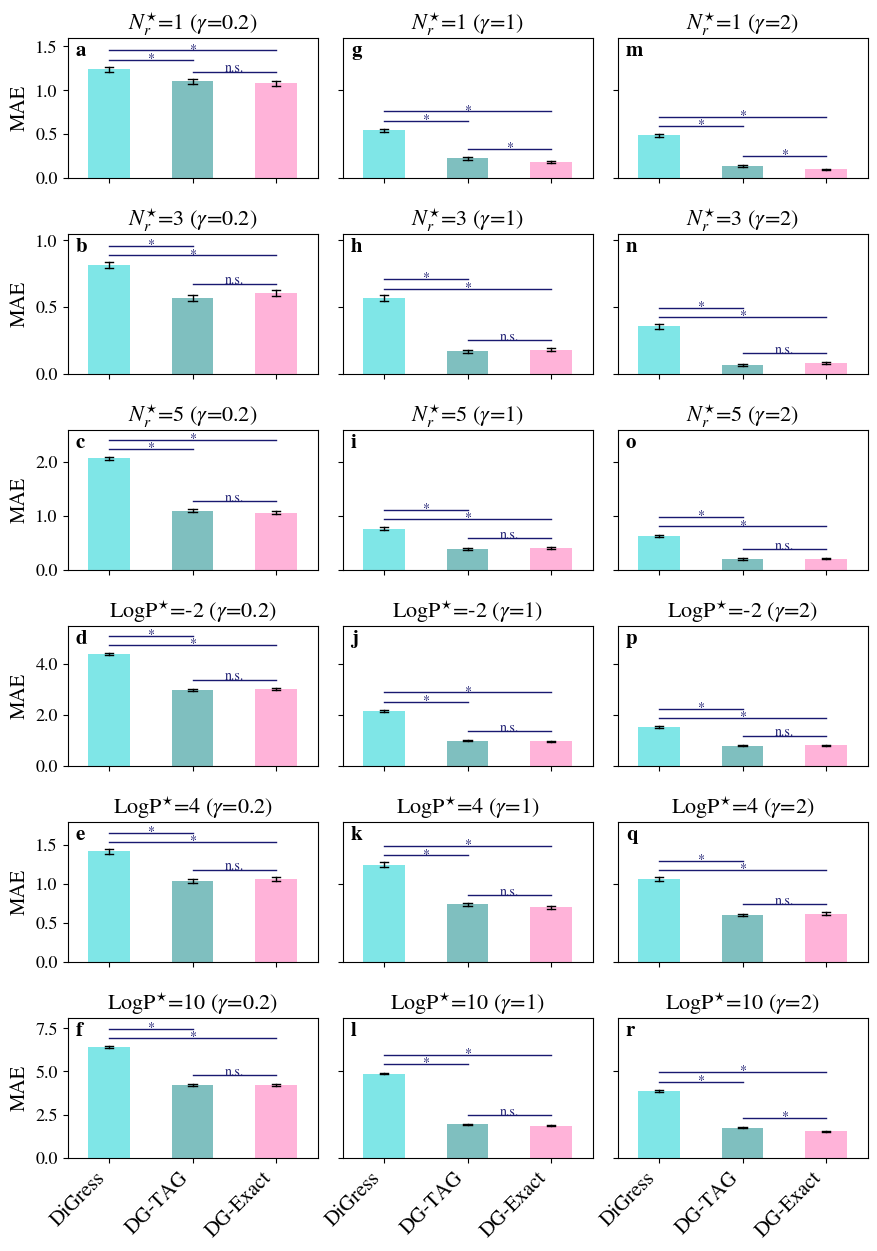

In [4]:
# Define general specifications
include_tag       = True # Should we include TAG?
num_valid_samples = 1000 # Number of valid SMILES string samples to show

# Define suffix specific plot specs
if include_tag:
    suffix_label_map = {
                        'DiGress':   'DiGress',
                        'TAG':       'DG-TAG',
                        'exact':     'DG-Exact',
    }
else:
    suffix_label_map = {
                        'DiGress':   'DiGress',
                        'exact':     'DG',
    }

suffix_color_map       = {
                          'exact':   'hotpink',
                          'TAG':     'teal',
                          'DiGress': 'darkturquoise',
}

# Define plot specs
plot_specs = {
    'bar_alpha': 0.5,
    'bar_width': 0.5,
    'p_val_annotation_color': 'midnightblue',
    'title_fs': 16,
    'xticklabels_fs': 15,
    'yaxislabel_fs': 15,
    'yticklabels_fs': 13,
    'p_val_annotation_fs': 10,
    'panel_label_fs': 15,
    'panel_label_fw': 'bold',
    'p_val_annotation_style': 'single_level', # '*' if p-value<=0.05 otherwise 'n.s.'
}
y_max_dict = {
    'num_rings=1': 1.6,
    'num_rings=3': 1.05,
    'num_rings=5': 2.6,
    'logp=-2':     5.5,
    'logp=4':      1.8,
    'logp=10':     8.1,
}

guide_temps              = [5, 1, 0.5]
property_name_value_list = [('num_rings', 1), ('num_rings', 3), ('num_rings', 5), ('logp', -2), ('logp', 4), ('logp', 10)]
panel_labels             = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']

# Step 1: Preparation
suffix_list = [suffix for suffix in suffix_label_map]
plot_specs['suffix_label_map'] = suffix_label_map
plot_specs['suffix_list']      = suffix_list
plot_specs['suffix_color_map'] = suffix_color_map

num_rows = len(property_name_value_list)
num_cols = len(guide_temps)

#figsize = (len(guide_temps)*3, len(property_name_value_list)*2)
figsize_scale = 10
figsize = (1*figsize_scale, 1.4*figsize_scale)
fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
for col_index, guide_temp in enumerate(guide_temps):
    for row_index, property_name_value in enumerate(property_name_value_list):
        property_name   = property_name_value[0]
        property_value  = property_name_value[1]
        property_prefix = f"{property_name}={property_value}"

        # Get the axis
        ax = axs[row_index, col_index]

        # Get the panel label
        subplot_index = row_index + num_rows*col_index
        panel_label = panel_labels[subplot_index]

        if guide_temp==0.5:
            guide_temp_label = 'T=05'
            gamma_label = '2'
        elif guide_temp==1:
            guide_temp_label = 'T=1'
            gamma_label = '1'
        elif guide_temp==5:
            guide_temp_label = 'T=5'
            gamma_label = '0.2'
        else:
            raise ValueError(f"No generation has been performed for guide temperature '{guide_temp}'")

        abs_error_distr_dict = dict()
        for suffix in suffix_list:
            key = f"{property_prefix}_{guide_temp_label}_{suffix}"
            try:
                property_distr = utils.get_property_distr(gen_df_dict[key], 'ground_truth', property_name=property_name, num_valid_samples=num_valid_samples, enfore_uniqueness=False)    
            except KeyError:
                abs_error_distr_dict[suffix] = None
                continue
            abs_error_distr = np.abs(property_value-property_distr)
            abs_error_distr_dict[suffix] = abs_error_distr

        # Make the plot
        if row_index==num_rows-1:
            show_xticklabels = True
        else:
            show_xticklabels = False
        if col_index==0:
            y_label = 'MAE'
            show_yticklabels = True
        else:
            y_label = None
            show_yticklabels = False
        
        if property_name=='num_rings':
            title = r'$N_{r}^{\star}$' + f"={property_value}"
        else: # property_name=='logp'
            title = r'$\mathrm{LogP}^{\star}$' + f"={property_value}"

        y_max_scale = 1.3
        p_val_annotation_offset = 0
        y_max = y_max_dict[property_prefix]

        title += ' (' + r'$\gamma$' + f"={gamma_label})"
        plotting.make_mae_plot(abs_error_distr_dict, 
                               plot_specs, 
                               ax=ax, 
                               y_max=y_max, 
                               y_max_scale=y_max_scale, 
                               p_val_annotation_offset=p_val_annotation_offset, 
                               y_label=y_label, 
                               show_xticklabels=show_xticklabels, 
                               show_yticklabels=show_yticklabels,
                               title=title, 
                               panel_label=panel_label, 
                               display_info=False)

### Global specs
# Adjust subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, #0.3, 
                    hspace=0.4)

plt.show()

# Save the figure as pdf
if include_tag:
    file_path = str(Path(figures_dir_path, 'appendix_framework_comparison.pdf'))
else:
    file_path = str(Path(figures_dir_path, 'appendix_framework_comparison_TAG_EXCLUDED.pdf'))
fig.savefig(file_path, format='pdf', bbox_inches='tight')